# Preprocessing 

In questo notebook modifichiamo il Dataset in modo che sia pronto per essere utilizzato per il training

# 1. Normalizzazione Dataset

Adesso normailizzeremo i valori dei pixel delle immagini da un range [0, 255] a un range [0, 1]

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Caricamento del dataset DeepWeeds
print("Caricamento dataset DeepWeeds...")
dataset, info = tfds.load(
    "DeepWeeds", 
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    download=True,
    data_dir="../data/raw/tensorflow_datasets"
)

training_set = dataset['train']
class_names = info.features['label'].names

print(f"Dataset caricato: {info.splits['train'].num_examples} immagini")
print(f"Classi: {len(class_names)}")

# Funzione di normalizzazione
def normalize_image(image, label):
    """Normalizza i pixel dell'immagine da [0, 255] a [0, 1]"""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Applica la normalizzazione al dataset
print("\nApplicazione normalizzazione...")
normalized_dataset = training_set.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)

# Verifica della normalizzazione
print("\n=== VERIFICA NORMALIZZAZIONE ===")

# Prendi un campione per verificare
sample_original = training_set.take(1)
sample_normalized = normalized_dataset.take(1)

for orig_img, orig_label in sample_original:
    print(f"Immagine originale - Min: {tf.reduce_min(orig_img).numpy()}, Max: {tf.reduce_max(orig_img).numpy()}")
    
for norm_img, norm_label in sample_normalized:
    print(f"Immagine normalizzata - Min: {tf.reduce_min(norm_img).numpy():.3f}, Max: {tf.reduce_max(norm_img).numpy():.3f}")

print("\n✅ Normalizzazione completata con successo!")

KeyboardInterrupt: 

# 2. Downsampling classe sbilanciata

Adesso andremo ad analizzare la distribuzione delle classi nel dataset e applicheremo il downsampling alla classe 'negative' per bilanciare il dataset e migliorare le performance del modello.

=== ANALISI DISTRIBUZIONE CLASSI ===
Classi disponibili: ['Chinee apple', 'Lantana', 'Parkinsonia', 'Parthenium', 'Prickly acacia', 'Rubber vine', 'Siam weed', 'Snake weed', 'Negative']

Conteggio classi in corso...

Distribuzione classi (totale: 17509 immagini):
  Chinee apple: 1125 immagini (6.4%)
  Lantana: 1064 immagini (6.1%)
  Negative: 9106 immagini (52.0%)
  Parkinsonia: 1031 immagini (5.9%)
  Parthenium: 1022 immagini (5.8%)
  Prickly acacia: 1062 immagini (6.1%)
  Rubber vine: 1009 immagini (5.8%)
  Siam weed: 1074 immagini (6.1%)
  Snake weed: 1016 immagini (5.8%)

Classe più numerosa: Negative con 9106 immagini

Distribuzione classi (totale: 17509 immagini):
  Chinee apple: 1125 immagini (6.4%)
  Lantana: 1064 immagini (6.1%)
  Negative: 9106 immagini (52.0%)
  Parkinsonia: 1031 immagini (5.9%)
  Parthenium: 1022 immagini (5.8%)
  Prickly acacia: 1062 immagini (6.1%)
  Rubber vine: 1009 immagini (5.8%)
  Siam weed: 1074 immagini (6.1%)
  Snake weed: 1016 immagini (5.8%)

Cl

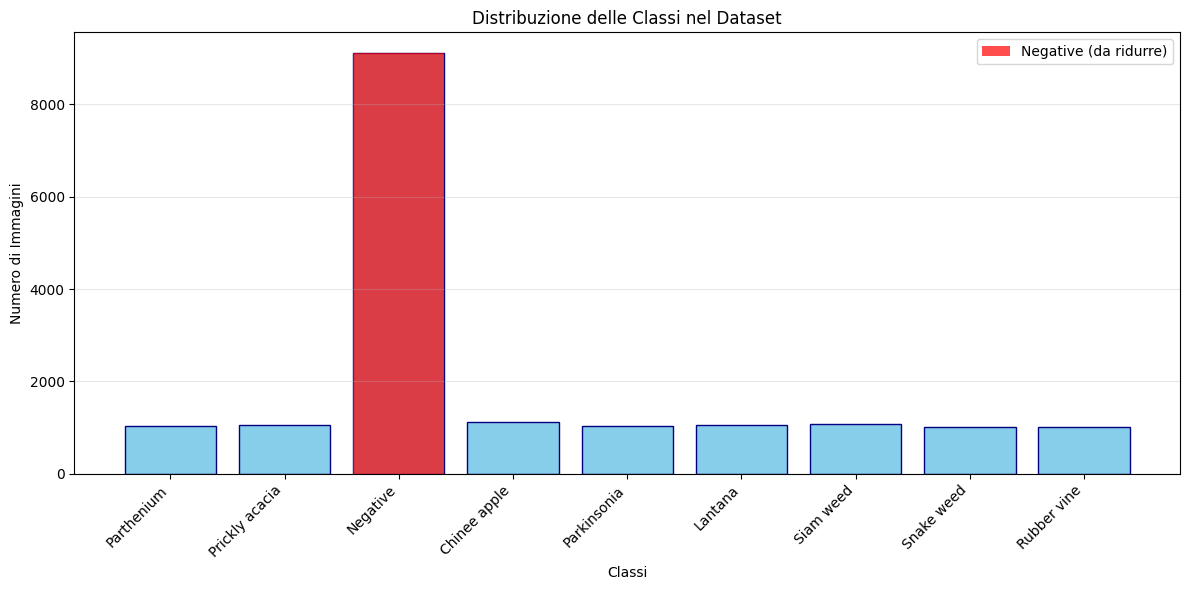

In [ ]:
# Analisi della distribuzione delle classi
print("=== ANALISI DISTRIBUZIONE CLASSI ===")
print(f"Classi disponibili: {class_names}")

# Conta le occorrenze di ogni classe
class_counts = {}
total_samples = 0

print("\nConteggio classi in corso...")
for image, label in normalized_dataset:
    label_name = class_names[label.numpy()]
    class_counts[label_name] = class_counts.get(label_name, 0) + 1
    total_samples += 1

print(f"\nDistribuzione classi (totale: {total_samples} immagini):")
for class_name, count in sorted(class_counts.items()):
    percentage = (count / total_samples) * 100
    print(f"  {class_name}: {count} immagini ({percentage:.1f}%)")

# Identifica la classe più numerosa (presumibilmente 'Negative')
max_class = max(class_counts, key=class_counts.get)
print(f"\nClasse più numerosa: {max_class} con {class_counts[max_class]} immagini")

# Visualizzazione grafica della distribuzione
plt.figure(figsize=(12, 6))
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.bar(classes, counts, color='skyblue', edgecolor='navy')
plt.title('Distribuzione delle Classi nel Dataset')
plt.xlabel('Classi')
plt.ylabel('Numero di Immagini')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Evidenzia la classe 'Negative' se presente
if 'Negative' in classes:
    negative_index = classes.index('Negative')
    plt.bar(classes[negative_index], counts[negative_index], color='red', alpha=0.7, label='Negative (da ridurre)')
    plt.legend()

plt.tight_layout()
plt.show()

=== DOWNSAMPLING CLASSE 'NEGATIVE' ===
Campioni attuali classe 'Negative': 9106
Target campioni dopo downsampling: 1125
Campioni da rimuovere: 7981

Separazione campioni per classe...


Campioni 'Negative' trovati: 9106
Campioni altre classi: 8403
Downsampling applicato: mantenuti 1125 campioni 'Negative'

Dataset bilanciato creato con 9528 campioni totali

=== VERIFICA NUOVA DISTRIBUZIONE ===

=== VERIFICA NUOVA DISTRIBUZIONE ===
Nuova distribuzione classi:
  Chinee apple: 1125 immagini (11.8%) [cambio: +0]
  Lantana: 1064 immagini (11.2%) [cambio: +0]
  Negative: 1125 immagini (11.8%) [cambio: -7981]
  Parkinsonia: 1031 immagini (10.8%) [cambio: +0]
  Parthenium: 1022 immagini (10.7%) [cambio: +0]
  Prickly acacia: 1062 immagini (11.1%) [cambio: +0]
  Rubber vine: 1009 immagini (10.6%) [cambio: +0]
  Siam weed: 1074 immagini (11.3%) [cambio: +0]
  Snake weed: 1016 immagini (10.7%) [cambio: +0]
Nuova distribuzione classi:
  Chinee apple: 1125 immagini (11.8%) [cambio: +0]
  Lantana: 1064 immagini (11.2%) [cambio: +0]
  Negative: 1125 immagini (11.8%) [cambio: -7981]
  Parkinsonia: 1031 immagini (10.8%) [cambio: +0]
  Parthenium: 1022 immagini (10.7%) [cambio: +0]
  P

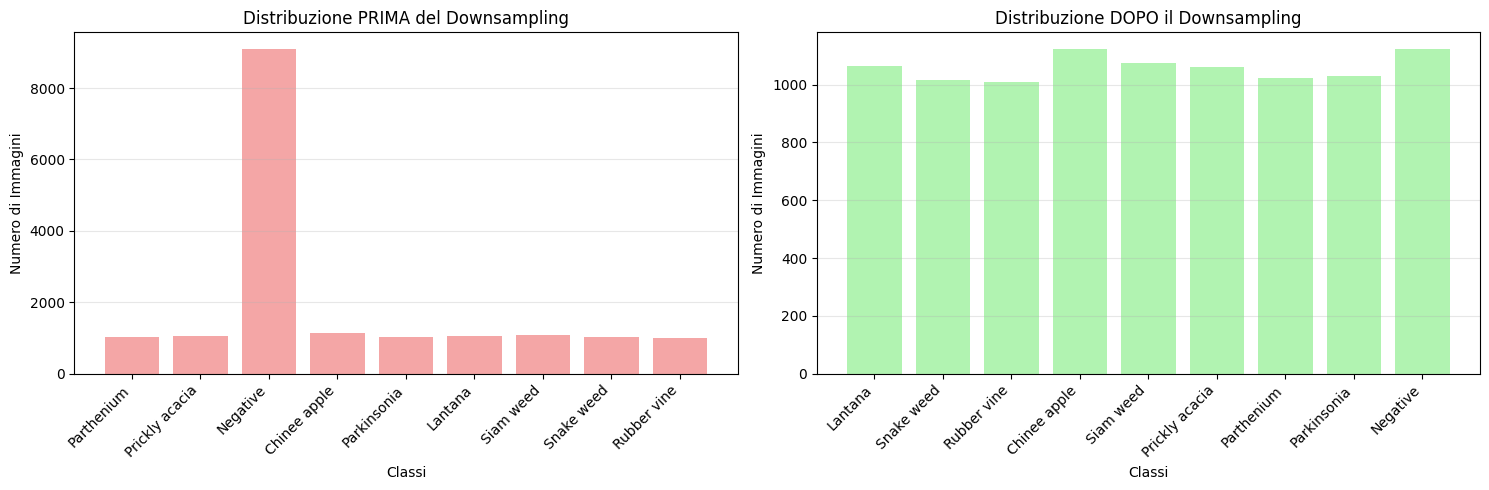


✅ Downsampling della classe 'Negative' completato con successo!
Dataset finale: 9528 campioni


In [ ]:
# Downsampling della classe 'Negative'
print("=== DOWNSAMPLING CLASSE 'NEGATIVE' ===")

# Parametri per il downsampling
if 'Negative' in class_counts:
    negative_count = class_counts['Negative']
    
    # Calcola il numero target per la classe Negative
    # Prendiamo la seconda classe più numerosa come riferimento
    sorted_counts = sorted(class_counts.values(), reverse=True)
    if len(sorted_counts) > 1:
        target_negative_count = sorted_counts[1]  # Seconda classe più numerosa
    else:
        target_negative_count = negative_count // 2  # Dimezza la classe Negative
    
    print(f"Campioni attuali classe 'Negative': {negative_count}")
    print(f"Target campioni dopo downsampling: {target_negative_count}")
    print(f"Campioni da rimuovere: {negative_count - target_negative_count}")
    
    # Separazione del dataset per classe
    negative_samples = []
    other_samples = []
    
    print("\nSeparazione campioni per classe...")
    for image, label in normalized_dataset:
        label_name = class_names[label.numpy()]
        if label_name == 'Negative':
            negative_samples.append((image, label))
        else:
            other_samples.append((image, label))
    
    print(f"Campioni 'Negative' trovati: {len(negative_samples)}")
    print(f"Campioni altre classi: {len(other_samples)}")
    
    # Downsampling casuale della classe 'Negative'
    np.random.seed(42)  # Per riproducibilità
    if len(negative_samples) > target_negative_count:
        # Seleziona casualmente i campioni da mantenere
        indices_to_keep = np.random.choice(
            len(negative_samples), 
            size=target_negative_count, 
            replace=False
        )
        downsampled_negative = [negative_samples[i] for i in indices_to_keep]
        print(f"Downsampling applicato: mantenuti {len(downsampled_negative)} campioni 'Negative'")
    else:
        downsampled_negative = negative_samples
        print("Downsampling non necessario: il numero di campioni è già ottimale")
    
    # Ricostruzione del dataset bilanciato
    balanced_samples = other_samples + downsampled_negative
    print(f"\nDataset bilanciato creato con {len(balanced_samples)} campioni totali")
    
    # Conversione in TensorFlow Dataset
    def create_dataset_from_samples(samples):
        images = []
        labels = []
        for img, lbl in samples:
            images.append(img)
            labels.append(lbl)
        
        images_tensor = tf.stack(images)
        labels_tensor = tf.stack(labels)
        
        return tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    
    balanced_dataset = create_dataset_from_samples(balanced_samples)
    
    # Verifica della nuova distribuzione
    print("\n=== VERIFICA NUOVA DISTRIBUZIONE ===")
    new_class_counts = {}
    for image, label in balanced_dataset:
        label_name = class_names[label.numpy()]
        new_class_counts[label_name] = new_class_counts.get(label_name, 0) + 1
    
    print("Nuova distribuzione classi:")
    for class_name, count in sorted(new_class_counts.items()):
        old_count = class_counts.get(class_name, 0)
        percentage = (count / len(balanced_samples)) * 100
        change = count - old_count
        print(f"  {class_name}: {count} immagini ({percentage:.1f}%) [cambio: {change:+d}]")
    
    # Visualizzazione del confronto
    plt.figure(figsize=(15, 5))
    
    # Prima del downsampling
    plt.subplot(1, 2, 1)
    plt.bar(class_counts.keys(), class_counts.values(), color='lightcoral', alpha=0.7)
    plt.title('Distribuzione PRIMA del Downsampling')
    plt.xlabel('Classi')
    plt.ylabel('Numero di Immagini')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Dopo il downsampling
    plt.subplot(1, 2, 2)
    plt.bar(new_class_counts.keys(), new_class_counts.values(), color='lightgreen', alpha=0.7)
    plt.title('Distribuzione DOPO il Downsampling')
    plt.xlabel('Classi')
    plt.ylabel('Numero di Immagini')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Downsampling della classe 'Negative' completato con successo!")
    print(f"Dataset finale: {len(balanced_samples)} campioni")
    
else:
    print("⚠️ Classe 'Negative' non trovata nel dataset")
    balanced_dataset = normalized_dataset
    print("Mantengo il dataset originale normalizzato")

# 3. Split Train/Validation/Test

Poiché il dataset DeepWeeds contiene solo il training set, implementeremo manualmente lo split in tre parti:
- **Training Set** (70%): per addestrare il modello
- **Validation Set** (20%): per monitorare le performance durante il training e tuning degli iperparametri
- **Test Set** (10%): per la valutazione finale del modello

Lo split sarà stratificato per mantenere la distribuzione delle classi bilanciata in tutti e tre i subset.

In [ ]:
# Split stratificato Train/Validation/Test
print("=== SPLIT TRAIN/VALIDATION/TEST ===")

from sklearn.model_selection import train_test_split
from collections import defaultdict

# Parametri dello split
TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1

print(f"Proporzioni split:")
print(f"- Training: {TRAIN_RATIO*100:.0f}%")
print(f"- Validation: {VAL_RATIO*100:.0f}%")
print(f"- Test: {TEST_RATIO*100:.0f}%")

# Organizziamo i campioni per classe per fare uno split stratificato
samples_by_class = defaultdict(list)

print("\nOrganizzazione campioni per classe...")
for image, label in balanced_dataset:
    label_name = class_names[label.numpy()]
    samples_by_class[label_name].append((image, label))

print("Campioni per classe dopo bilanciamento:")
for class_name, samples in samples_by_class.items():
    print(f"  {class_name}: {len(samples)} campioni")

# Split stratificato per ogni classe
train_samples = []
val_samples = []
test_samples = []

print("\nEsecuzione split stratificato...")
for class_name, samples in samples_by_class.items():
    np.random.seed(42)  # Per riproducibilità
    n_samples = len(samples)
    
    # Calcola le dimensioni dei subset
    n_train = int(n_samples * TRAIN_RATIO)
    n_val = int(n_samples * VAL_RATIO)
    n_test = n_samples - n_train - n_val  # Il resto va al test set
    
    # Shuffle dei campioni della classe
    shuffled_samples = samples.copy()
    np.random.shuffle(shuffled_samples)
    
    # Split
    class_train = shuffled_samples[:n_train]
    class_val = shuffled_samples[n_train:n_train+n_val]
    class_test = shuffled_samples[n_train+n_val:]
    
    # Aggiungi ai dataset finali
    train_samples.extend(class_train)
    val_samples.extend(class_val)
    test_samples.extend(class_test)
    
    print(f"  {class_name}: Train={len(class_train)}, Val={len(class_val)}, Test={len(class_test)}")

# Shuffle finale di tutti i dataset
print("\nShuffle finale dei dataset...")
np.random.seed(42)
np.random.shuffle(train_samples)
np.random.shuffle(val_samples) 
np.random.shuffle(test_samples)

print(f"\nDimensioni finali:")
print(f"- Training set: {len(train_samples)} campioni")
print(f"- Validation set: {len(val_samples)} campioni")
print(f"- Test set: {len(test_samples)} campioni")
print(f"- Totale: {len(train_samples) + len(val_samples) + len(test_samples)} campioni")

=== SPLIT TRAIN/VALIDATION/TEST ===
Proporzioni split:
- Training: 70%
- Validation: 20%
- Test: 10%

Organizzazione campioni per classe...
Proporzioni split:
- Training: 70%
- Validation: 20%
- Test: 10%

Organizzazione campioni per classe...
Campioni per classe dopo bilanciamento:
  Lantana: 1064 campioni
  Snake weed: 1016 campioni
  Rubber vine: 1009 campioni
  Chinee apple: 1125 campioni
  Siam weed: 1074 campioni
  Prickly acacia: 1062 campioni
  Parthenium: 1022 campioni
  Parkinsonia: 1031 campioni
  Negative: 1125 campioni

Esecuzione split stratificato...
  Lantana: Train=744, Val=212, Test=108
  Snake weed: Train=711, Val=203, Test=102
  Rubber vine: Train=706, Val=201, Test=102
  Chinee apple: Train=787, Val=225, Test=113
  Siam weed: Train=751, Val=214, Test=109
  Prickly acacia: Train=743, Val=212, Test=107
  Parthenium: Train=715, Val=204, Test=103
  Parkinsonia: Train=721, Val=206, Test=104
  Negative: Train=787, Val=225, Test=113

Shuffle finale dei dataset...

Dimensi


=== CONVERSIONE IN TENSORFLOW DATASETS ===
Dataset TensorFlow creati:
- train_dataset: 6665 campioni, batch size 32
- val_dataset: 1902 campioni, batch size 32
- test_dataset: 961 campioni, batch size 32

=== VERIFICA DISTRIBUZIONE CLASSI NEI SUBSET ===

Training Set:
  Chinee apple: 787 (11.8%)
  Lantana: 744 (11.2%)
  Negative: 787 (11.8%)
  Parkinsonia: 721 (10.8%)
  Parthenium: 715 (10.7%)
  Prickly acacia: 743 (11.1%)
  Rubber vine: 706 (10.6%)
  Siam weed: 751 (11.3%)
  Snake weed: 711 (10.7%)

Validation Set:
  Chinee apple: 225 (11.8%)
  Lantana: 212 (11.1%)
  Negative: 225 (11.8%)
  Parkinsonia: 206 (10.8%)
  Parthenium: 204 (10.7%)
  Prickly acacia: 212 (11.1%)
  Rubber vine: 201 (10.6%)
  Siam weed: 214 (11.3%)
  Snake weed: 203 (10.7%)

Test Set:
  Chinee apple: 113 (11.8%)
  Lantana: 108 (11.2%)
  Negative: 113 (11.8%)
  Parkinsonia: 104 (10.8%)
  Parthenium: 103 (10.7%)
  Prickly acacia: 107 (11.1%)
  Rubber vine: 102 (10.6%)
  Siam weed: 109 (11.3%)
  Snake weed: 102 (1

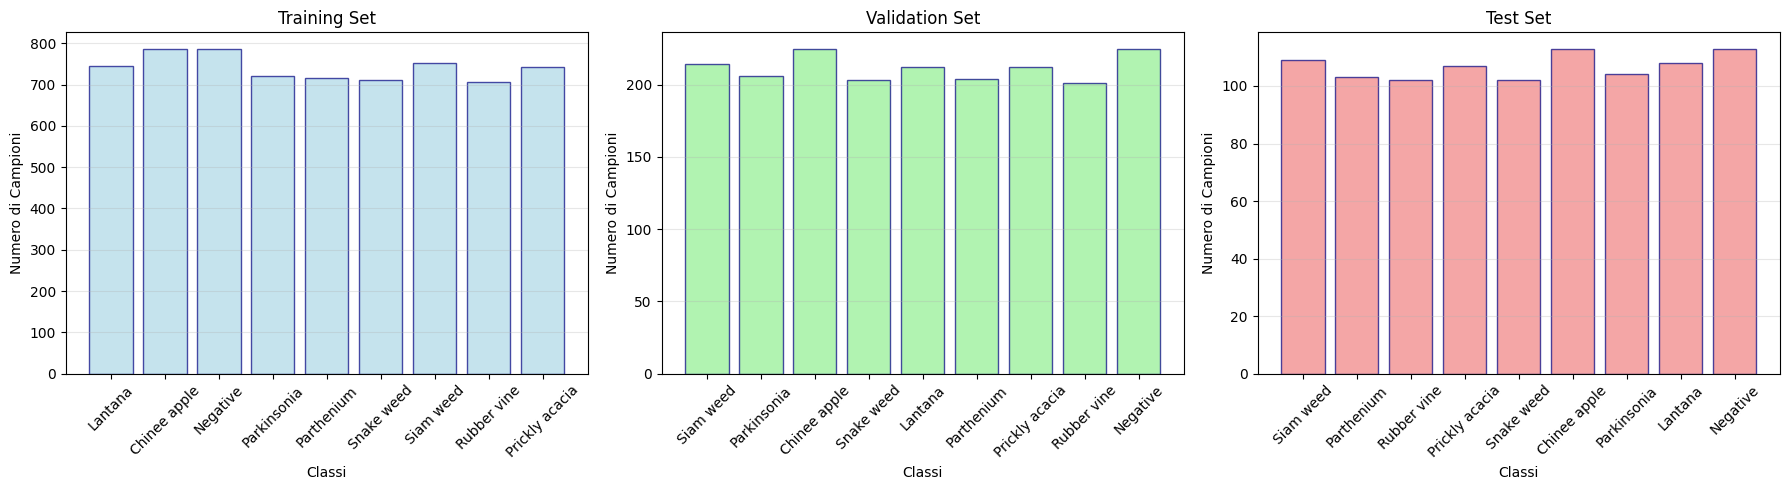


✅ Split train/validation/test completato con successo!
Dataset disponibili: train_dataset, val_dataset, test_dataset


In [ ]:
# Conversione in TensorFlow Datasets
print("\n=== CONVERSIONE IN TENSORFLOW DATASETS ===")

def create_tf_dataset_from_samples(samples, batch_size=32):
    """Converte una lista di campioni in un TensorFlow Dataset ottimizzato"""
    if not samples:
        return None
    
    images = []
    labels = []
    for img, lbl in samples:
        images.append(img)
        labels.append(lbl)
    
    images_tensor = tf.stack(images)
    labels_tensor = tf.stack(labels)
    
    dataset = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    dataset = dataset.batch(batch_size)
    dataset = dataset.cache()
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

# Crea i dataset TensorFlow
BATCH_SIZE = 32

train_dataset = create_tf_dataset_from_samples(train_samples, BATCH_SIZE)
val_dataset = create_tf_dataset_from_samples(val_samples, BATCH_SIZE)
test_dataset = create_tf_dataset_from_samples(test_samples, BATCH_SIZE)

print(f"Dataset TensorFlow creati:")
print(f"- train_dataset: {len(train_samples)} campioni, batch size {BATCH_SIZE}")
print(f"- val_dataset: {len(val_samples)} campioni, batch size {BATCH_SIZE}")
print(f"- test_dataset: {len(test_samples)} campioni, batch size {BATCH_SIZE}")

# Verifica distribuzione classi nei tre subset
print("\n=== VERIFICA DISTRIBUZIONE CLASSI NEI SUBSET ===")

def verify_class_distribution(samples, dataset_name):
    """Verifica la distribuzione delle classi in un subset"""
    class_counts = {}
    for _, label in samples:
        label_name = class_names[label.numpy()]
        class_counts[label_name] = class_counts.get(label_name, 0) + 1
    
    print(f"\n{dataset_name}:")
    total = len(samples)
    for class_name, count in sorted(class_counts.items()):
        percentage = (count / total) * 100
        print(f"  {class_name}: {count} ({percentage:.1f}%)")
    return class_counts

train_class_counts = verify_class_distribution(train_samples, "Training Set")
val_class_counts = verify_class_distribution(val_samples, "Validation Set")
test_class_counts = verify_class_distribution(test_samples, "Test Set")

# Visualizzazione della distribuzione nei tre subset
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets_info = [
    (train_class_counts, "Training Set", "lightblue"),
    (val_class_counts, "Validation Set", "lightgreen"), 
    (test_class_counts, "Test Set", "lightcoral")
]

for idx, (class_counts, title, color) in enumerate(datasets_info):
    ax = axes[idx]
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    ax.bar(classes, counts, color=color, alpha=0.7, edgecolor='navy')
    ax.set_title(title)
    ax.set_xlabel('Classi')
    ax.set_ylabel('Numero di Campioni')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Split train/validation/test completato con successo!")
print("Dataset disponibili: train_dataset, val_dataset, test_dataset")

In [ ]:
# Riepilogo finale del preprocessing
print("=== RIEPILOGO PREPROCESSING COMPLETATO ===")

print("Preprocessing applicato:")
print("- ✅ Normalizzazione pixel [0,1]")
print("- ✅ Bilanciamento classi (downsampling 'negative')")
print("- ✅ Split stratificato train/validation/test")
print("- ✅ Ottimizzazione performance (batch, cache, prefetch)")

# Visualizza un campione dal training set
print("\n=== CAMPIONE DAL TRAINING SET ===")
sample_batch = train_dataset.take(1)
for images, labels in sample_batch:
    # Prendi il primo elemento del batch
    sample_image = images[0]
    sample_label = labels[0]
    
    print(f"Batch shape: {images.shape}")
    print(f"Immagine shape: {sample_image.shape}")
    print(f"Label: {class_names[sample_label.numpy()]} (index: {sample_label.numpy()})")
    print(f"Pixel range: [{tf.reduce_min(sample_image).numpy():.3f}, {tf.reduce_max(sample_image).numpy():.3f}]")

print(f"\n=== DATASET FINALI DISPONIBILI ===")
print(f" train_dataset: {len(train_samples)} campioni per training")
print(f" val_dataset: {len(val_samples)} campioni per validation")
print(f" test_dataset: {len(test_samples)} campioni per test finale")

print(f"\n✅ Preprocessing completato! I dataset sono pronti per il training.")

=== RIEPILOGO PREPROCESSING COMPLETATO ===
Preprocessing applicato:
- ✅ Normalizzazione pixel [0,1]
- ✅ Bilanciamento classi (downsampling 'negative')
- ✅ Split stratificato train/validation/test
- ✅ Ottimizzazione performance (batch, cache, prefetch)

=== CAMPIONE DAL TRAINING SET ===


Batch shape: (32, 256, 256, 3)
Immagine shape: (256, 256, 3)
Label: Lantana (index: 1)
Pixel range: [0.000, 1.000]

=== DATASET FINALI DISPONIBILI ===
 train_dataset: 6665 campioni per training
 val_dataset: 1902 campioni per validation
 test_dataset: 961 campioni per test finale

✅ Preprocessing completato! I dataset sono pronti per il training.


# 4. Salvataggio Dataset Preprocessati

Salviamo i dataset preprocessati nella cartella `data/processed` per riutilizzarli in altri notebook senza dover ripetere il preprocessing.

In [ ]:
import os
import pickle

# Crea la directory processed se non esiste
processed_dir = "../data/processed"
os.makedirs(processed_dir, exist_ok=True)

print("=== SALVATAGGIO DATASET PREPROCESSATI ===")
print(f"Salvataggio in: {processed_dir}")

# Invece di salvare le liste di tensori (che causano MemoryError),
# salviamo solo i TensorFlow Datasets che sono più efficienti
print("💾 Salvataggio TensorFlow Datasets...")

try:
    # Salva usando tf.data.experimental.save (più efficiente)
    tf.data.experimental.save(train_dataset, f"{processed_dir}/train_dataset")
    print(f"   ✅ train_dataset/ (TensorFlow format)")
    
    tf.data.experimental.save(val_dataset, f"{processed_dir}/val_dataset") 
    print(f"   ✅ val_dataset/ (TensorFlow format)")
    
    tf.data.experimental.save(test_dataset, f"{processed_dir}/test_dataset")
    print(f"   ✅ test_dataset/ (TensorFlow format)")

    # Salviamo anche le informazioni sui dataset (metadati)
    dataset_info = {
        'train_samples': len(train_samples),
        'val_samples': len(val_samples),
        'test_samples': len(test_samples),
        'batch_size': BATCH_SIZE,
        'class_names': class_names,
        'train_class_distribution': train_class_counts,
        'val_class_distribution': val_class_counts,
        'test_class_distribution': test_class_counts
    }
    
    with open(f"{processed_dir}/dataset_info.pkl", 'wb') as f:
        pickle.dump(dataset_info, f)
    print(f"   ✅ dataset_info.pkl (metadati)")

    # Verifica del salvataggio
    total_size = 0
    for root, dirs, files in os.walk(processed_dir):
        for file in files:
            file_path = os.path.join(root, file)
            total_size += os.path.getsize(file_path)

    print(f"\n📊 RIEPILOGO SALVATAGGIO:")
    print(f"   Directory: {processed_dir}")
    print(f"   Dimensione totale: {total_size / (1024*1024):.1f} MB")
    print(f"   Files/Directories creati: {len([f for r, d, files in os.walk(processed_dir) for f in files]) + len([d for r, dirs, f in os.walk(processed_dir) for d in dirs])}")

    print(f"\n✅ Dataset preprocessati salvati con successo!")
    print(f"💡 Ora puoi caricarli in altri notebook con:")
    print(f"   train_dataset = tf.data.experimental.load('{processed_dir}/train_dataset')")
    print(f"   val_dataset = tf.data.experimental.load('{processed_dir}/val_dataset')")
    print(f"   test_dataset = tf.data.experimental.load('{processed_dir}/test_dataset')")
    
except Exception as e:
    print(f"❌ Errore durante il salvataggio: {e}")
    print("💡 Il dataset è comunque disponibile in memoria per l'uso immediato.")

=== SALVATAGGIO DATASET PREPROCESSATI ===
Salvataggio in: ../data/processed
💾 Salvataggio TensorFlow Datasets...
Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


   ✅ train_dataset/ (TensorFlow format)
   ✅ val_dataset/ (TensorFlow format)
   ✅ val_dataset/ (TensorFlow format)
   ✅ test_dataset/ (TensorFlow format)
   ✅ dataset_info.pkl (metadati)

📊 RIEPILOGO SALVATAGGIO:
   Directory: ../data/processed
   Dimensione totale: 8181.2 MB
   Files/Directories creati: 21

✅ Dataset preprocessati salvati con successo!
💡 Ora puoi caricarli in altri notebook con:
   train_dataset = tf.data.experimental.load('../data/processed/train_dataset')
   val_dataset = tf.data.experimental.load('../data/processed/val_dataset')
   test_dataset = tf.data.experimental.load('../data/processed/test_dataset')
   ✅ test_dataset/ (TensorFlow format)
   ✅ dataset_info.pkl (metadati)

📊 RIEPILOGO SALVATAGGIO:
   Directory: ../data/processed
   Dimensione totale: 8181.2 MB
   Files/Directories creati: 21

✅ Dataset preprocessati salvati con successo!
💡 Ora puoi caricarli in altri notebook con:
   train_dataset = tf.data.experimental.load('../data/processed/train_dataset')
